In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from statsmodels.tsa.seasonal import STL
import requests
import json
import pandas as pd
plt.rcParams['savefig.facecolor'] = "0.8"

import random
import pickle

In [2]:
df = pd.read_csv('BTC_Daily_ohlc.csv')

In [3]:
start_date = "2022-10-01"
end_date = "2023-02-31"
mask = (df["date"] > start_date) & (df["date"] <= end_date)
df_short_date = df.loc[mask]

min_coloumn = df_short_date.min(axis=0)
max_coloumn = df_short_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_short_date.index)

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

Min_x : 0
Max_x : 151
Min_y : 15476.05125538628
Max_y : 25250.160223769217


In [4]:
start_date = "2022-10-01"
end_date = "2024-01-31"
mask = (df["date"] > start_date) & (df["date"] <= end_date)
df_date = df.loc[mask]

min_coloumn = df_date.min(axis=0)
max_coloumn = df_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_date.index)

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

Min_x : 0
Max_x : 487
Min_y : 15476.05125538628
Max_y : 48973.29998031062


In [5]:
def candleplot(df, x_min = 0, x_max = len(df), savefig =  True, filename = None):
    ## Figure params
    plt.figure(figsize=(20, 7.68))  # Taille de la figure en inches (20 pouces de largeur, 7.68 pouces de hauteur)
    plt.figure(dpi = 200)
    plt.ylabel('price (dollars)')
    plt.title('Bitcoin')
    plt.xlabel('weeks')

    ## Import ohlc 
    opens = df['open'].values[x_min:x_max]
    truth = df['close'].values[x_min:x_max]
    highs = df['high'].values[x_min:x_max]
    lows = df['low'].values[x_min:x_max]

    ## Draw candles
    height = truth - opens
    bottom = np.where(height > 0, opens, truth + abs(height))
    color = np.where(height > 0, 'g', 'r')
    plt.bar(range(len(truth)), height, bottom=bottom, color=color, align='center')
    plt.vlines(range(len(highs)), ymin=lows, ymax=highs, color=color, linewidth=1)

    if savefig :
        if not filename :
            plt.savefig(f'./plots/plot_BTC_{x_min}:{x_max}')
        else :
            plt.savefig(f'./plots/{filename}')
            

In [6]:
def candleplot_2026(df, x_min = 0, x_max = len(df), savefig =  True, filename = None, points = [], MC_point = []):
    ## Figure params
    # plt.figure(figsize=(20, 7.68))  # Taille de la figure en inches (20 pouces de largeur, 7.68 pouces de hauteur)
    plt.figure(dpi = 200)
    # plt.ylabel('price (dollars)')
    plt.xlabel('weeks')

    ## Import ohlc 
    opens = df['open'].values[x_min:x_max]
    truth = df['close'].values[x_min:x_max]
    highs = df['high'].values[x_min:x_max]
    lows = df['low'].values[x_min:x_max]

    ## Draw candles
    height = truth - opens
    bottom = np.where(height > 0, opens, truth + abs(height))
    color = np.where(height > 0, 'g', 'r')
    plt.bar(range(len(truth)), height, bottom=bottom, color=color, align='center')
    indice = np.max(highs)
    plt.vlines(range(len(highs)), ymin=lows, ymax=highs, color=color, linewidth=1)

    for elt in points :
        # print([elt[0][0], elt[1][0]], [elt[1][0], elt[1][1]])
        plt.plot([elt[0][0], elt[1][0]], [elt[0][1], elt[1][1]], linewidth=1, color='black')

    for elt in MC_point :
        plt.scatter(elt[0],elt[1], color = 'red')

    plt.xlim(-25, 525)
    plt.ylim(-1683,94500)


    if savefig :
        if not filename :
            plt.savefig(f'./plots/plot_BTC_{x_min}:{x_max}')
        else :
            plt.savefig(f'./plots/{filename}')
            

<Figure size 2000x768 with 0 Axes>

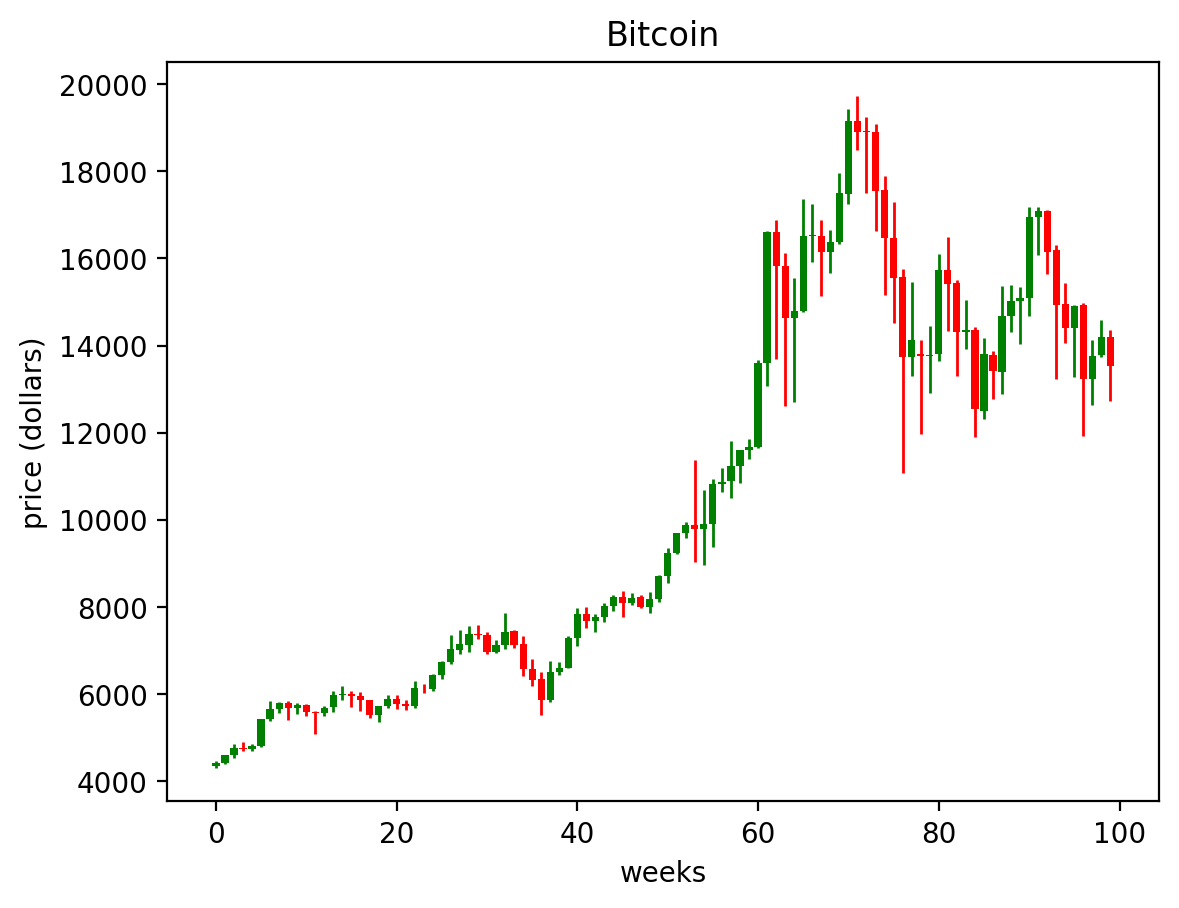

In [7]:
candleplot(df, x_min = 50, x_max = 150, savefig= True)

<Figure size 2000x768 with 0 Axes>

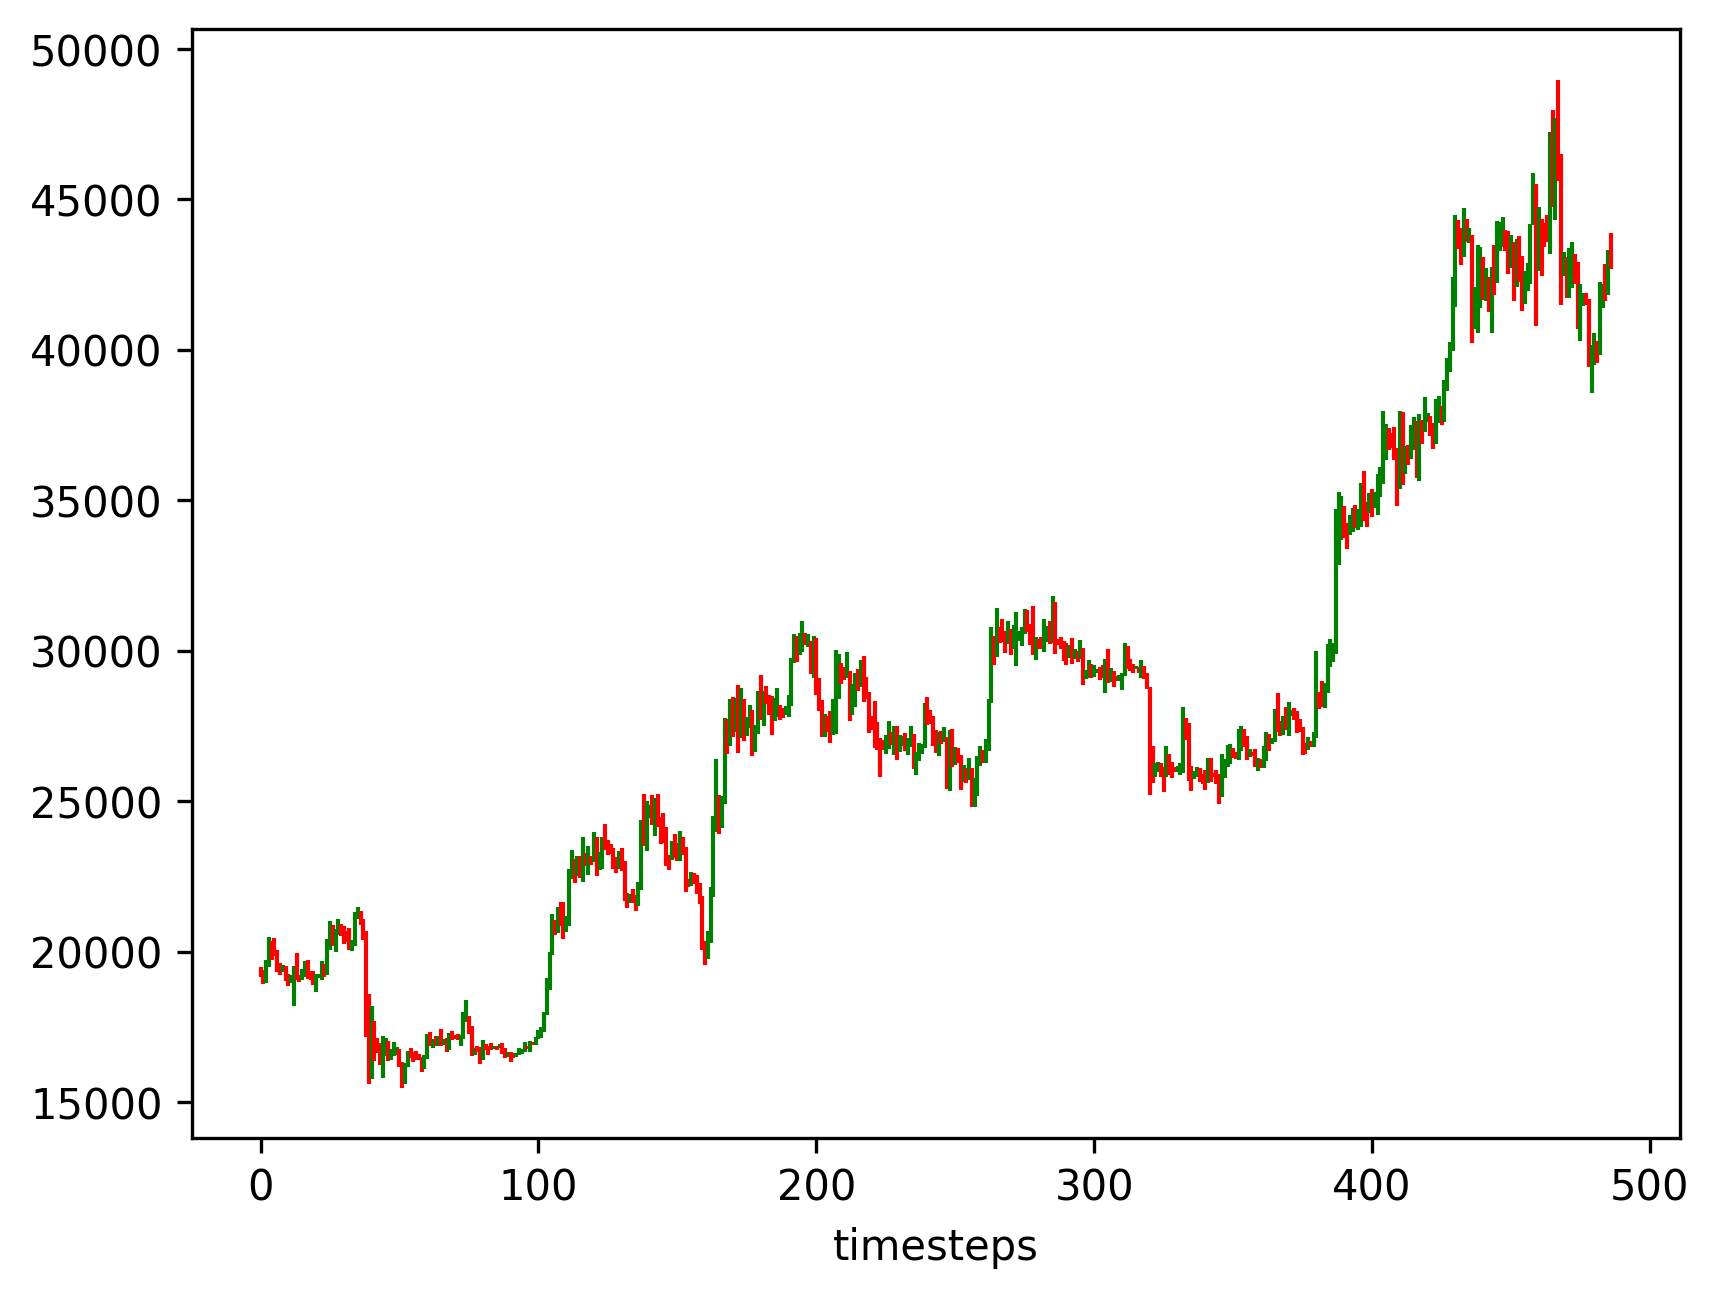

In [12]:
candleplot(df_date, savefig= True)

In [8]:
with open('./pickle/ma_liste.pkl', 'rb') as fichier:
    ma_liste_chargee = pickle.load(fichier)
print(ma_liste_chargee)
new_draw_list = []
new_f_list = []

for elt in ma_liste_chargee :
    a_real = (elt[1][1]-elt[0][1])/(elt[1][0]-elt[0][0])
    b_real = elt[0][1] - a_real * elt[0][0]
    new_draw_list.append(((0,b_real),(500,500 * a_real + b_real)))
    new_f_list.append((a_real,b_real))

print(new_draw_list)


[((0, 15394.319065126054), (337, 72018.32484243697)), ((0, 13603.424495341613), (337, 41505.10850155279)), ((0, 78988.69635881696), (337, -393.0478515625)), ((0, 11089.875), (337, 64568.10267857143)), ((0, 28460.450334821428), (337, 61884.34263392857)), ((0, 13691.855986926024), (337, 55869.62484056123)), ((0, 8135.276785714286), (337, 61613.50446428571)), ((0, -996.6202876984075), (337, 50170.81977513227)), ((0, 24582.540178571428), (337, 24582.540178571428)), ((0, 13793.780032467526), (337, 103824.46636002886)), ((0, 23745.40401785714), (337, 50484.517857142855)), ((0, 28460.450334821428), (337, 61884.34263392857)), ((0, 13995.229910714286), (337, 58560.419642857145)), ((0, 19018.046875), (337, 81409.3125)), ((0, 39355.53125), (337, 39355.53125)), ((0, 27675.01964285714), (337, 88283.67767857145)), ((0, 8965.378188775512), (337, 85362.8463010204)), ((0, 24129.501785714285), (337, 49086.00803571429)), ((0, 7162.721540178572), (337, 62869.20870535714)), ((0, 28460.450334821428), (337, 

In [9]:
def evaluate_MC(point, list_coef) :
    score = 0
    for elt in list_coef :
        # print(point[0], point[1])
        if elt[0] * point[0] + elt[1] < point[1] :
            score += 1
        else :
            score -= 1
    return score

x_interval = [337,500]
y_interval = [20000,100000]

list_point_MC = []

for i in range(2000) :
    random_x = random.randint(x_interval[0], x_interval[1])
    random_y = random.randint(y_interval[0], y_interval[1])
    score = evaluate_MC((random_x,random_y), new_f_list)
    if abs(score) < 5 :
        list_point_MC.append((random_x,random_y))



In [10]:
x_interval_R = [0,500]
y_interval_R = [1,100000]

list_point_MC_R_1000 = []
new_draw_list_R = []
new_f_list_R = []
list_point_MC_R_100 = []
list_point_MC_R_50 = []
list_point_MC_R_2000 = []
list_point_MC_R_4000 = []
list_point_MC_R_5000 = []
list_point_MC_R_8000 = []
list_point_MC_R_10000 = []

list_of_list = [list_point_MC_R_50, list_point_MC_R_100, list_point_MC_R_1000, list_point_MC_R_2000, list_point_MC_R_4000,list_point_MC_R_5000 ,list_point_MC_R_8000, list_point_MC_R_10000]

for i in range(10000) :
    random_x_0 = random.randint(x_interval_R[0], x_interval_R[1])
    random_y_0 = random.randint(y_interval_R[0], y_interval_R[1])
    random_x_1 = random.randint(x_interval_R[0], x_interval_R[1])
    random_y_1 = random.randint(y_interval_R[0], y_interval_R[1])

    if (random_x_1 == random_x_0) :
        continue
    a_real = (random_y_1-random_y_0)/(random_x_1-random_x_0)
    b_real = random_y_0 - a_real * random_x_0
    new_draw_list_R.append(((0,b_real),(500,500 * a_real + b_real)))
    new_f_list_R.append((a_real,b_real))


for i in range(50000) :
    random_x = random.randint(x_interval_R[0], x_interval_R[1])
    random_y = random.randint(y_interval_R[0], y_interval_R[1])
    score_thresh = 50
    score = evaluate_MC((random_x,random_y),new_f_list_R)
    if abs(score) < score_thresh :
        list_point_MC_R_50.append((random_x,random_y))
    if abs(score) < 100 :
        list_point_MC_R_100.append((random_x,random_y))
    if abs(score) < 1000 :
        list_point_MC_R_1000.append((random_x,random_y))
    if abs(score) < 2000 :
        list_point_MC_R_2000.append((random_x,random_y))
    if abs(score) < 4000 :
        list_point_MC_R_4000.append((random_x,random_y))
    if abs(score) < 5000 :
        list_point_MC_R_5000.append((random_x,random_y))
    if abs(score) < 8000 :
        list_point_MC_R_8000.append((random_x,random_y))
    if abs(score) < 10000 :
        list_point_MC_R_10000.append((random_x,random_y))


In [11]:
df_weekly = pd.read_csv('BTC_BinWeekly.csv')
start_date = "2017-08-21"
end_date = "2024-01-31"
filename = start_date + "_" + end_date
mask = (df_weekly["date"] > start_date) & (df_weekly["date"] <= end_date)
df_weekly_date = df_weekly.loc[mask]

min_coloumn = df_weekly_date.min(axis=0)
max_coloumn = df_weekly_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_weekly_date.index)
name_list = [50,100,1000,2000,4000,5000,8000,10000]

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

filename_xlim = filename + "xlim_500"

# candleplot(df_weekly_date, savefig= True, filename=filename)
for i,elt in enumerate(name_list) :
    name = str(elt)
    cur_filename = filename + name
    candleplot_2026(df_weekly_date, savefig= True, filename=cur_filename, MC_point = list_of_list[i])

Min_x : 0
Max_x : 337
Min_y : 2817.0
Max_y : 69000.0


KeyboardInterrupt: 

Min_x : 0
Max_x : 159
Min_y : 2817.0
Max_y : 19798.68
Min_x : 0
Max_x : 76
Min_y : 2817.0
Max_y : 19798.68
Min_x : 0
Max_x : 267
Min_y : 2817.0
Max_y : 69000.0


<Figure size 2000x768 with 0 Axes>

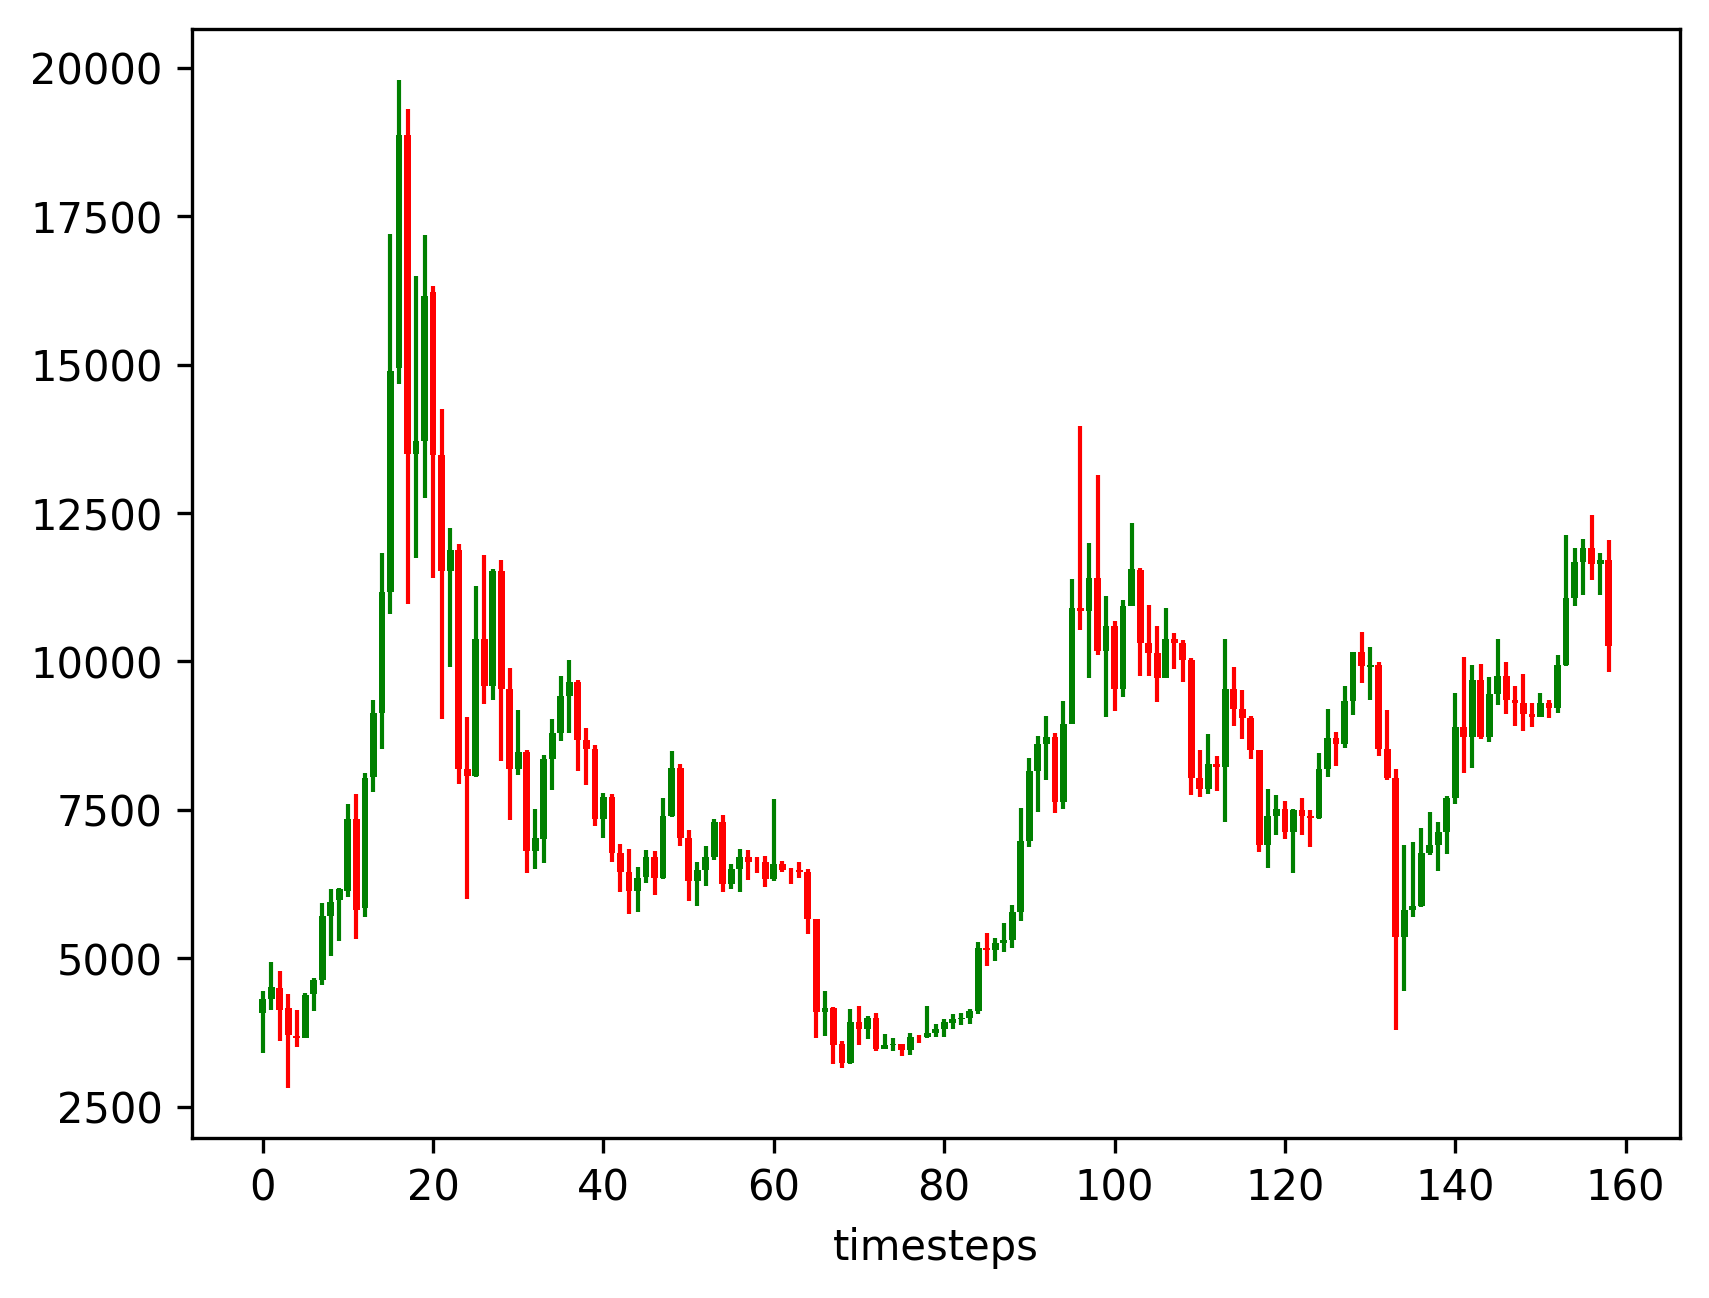

<Figure size 2000x768 with 0 Axes>

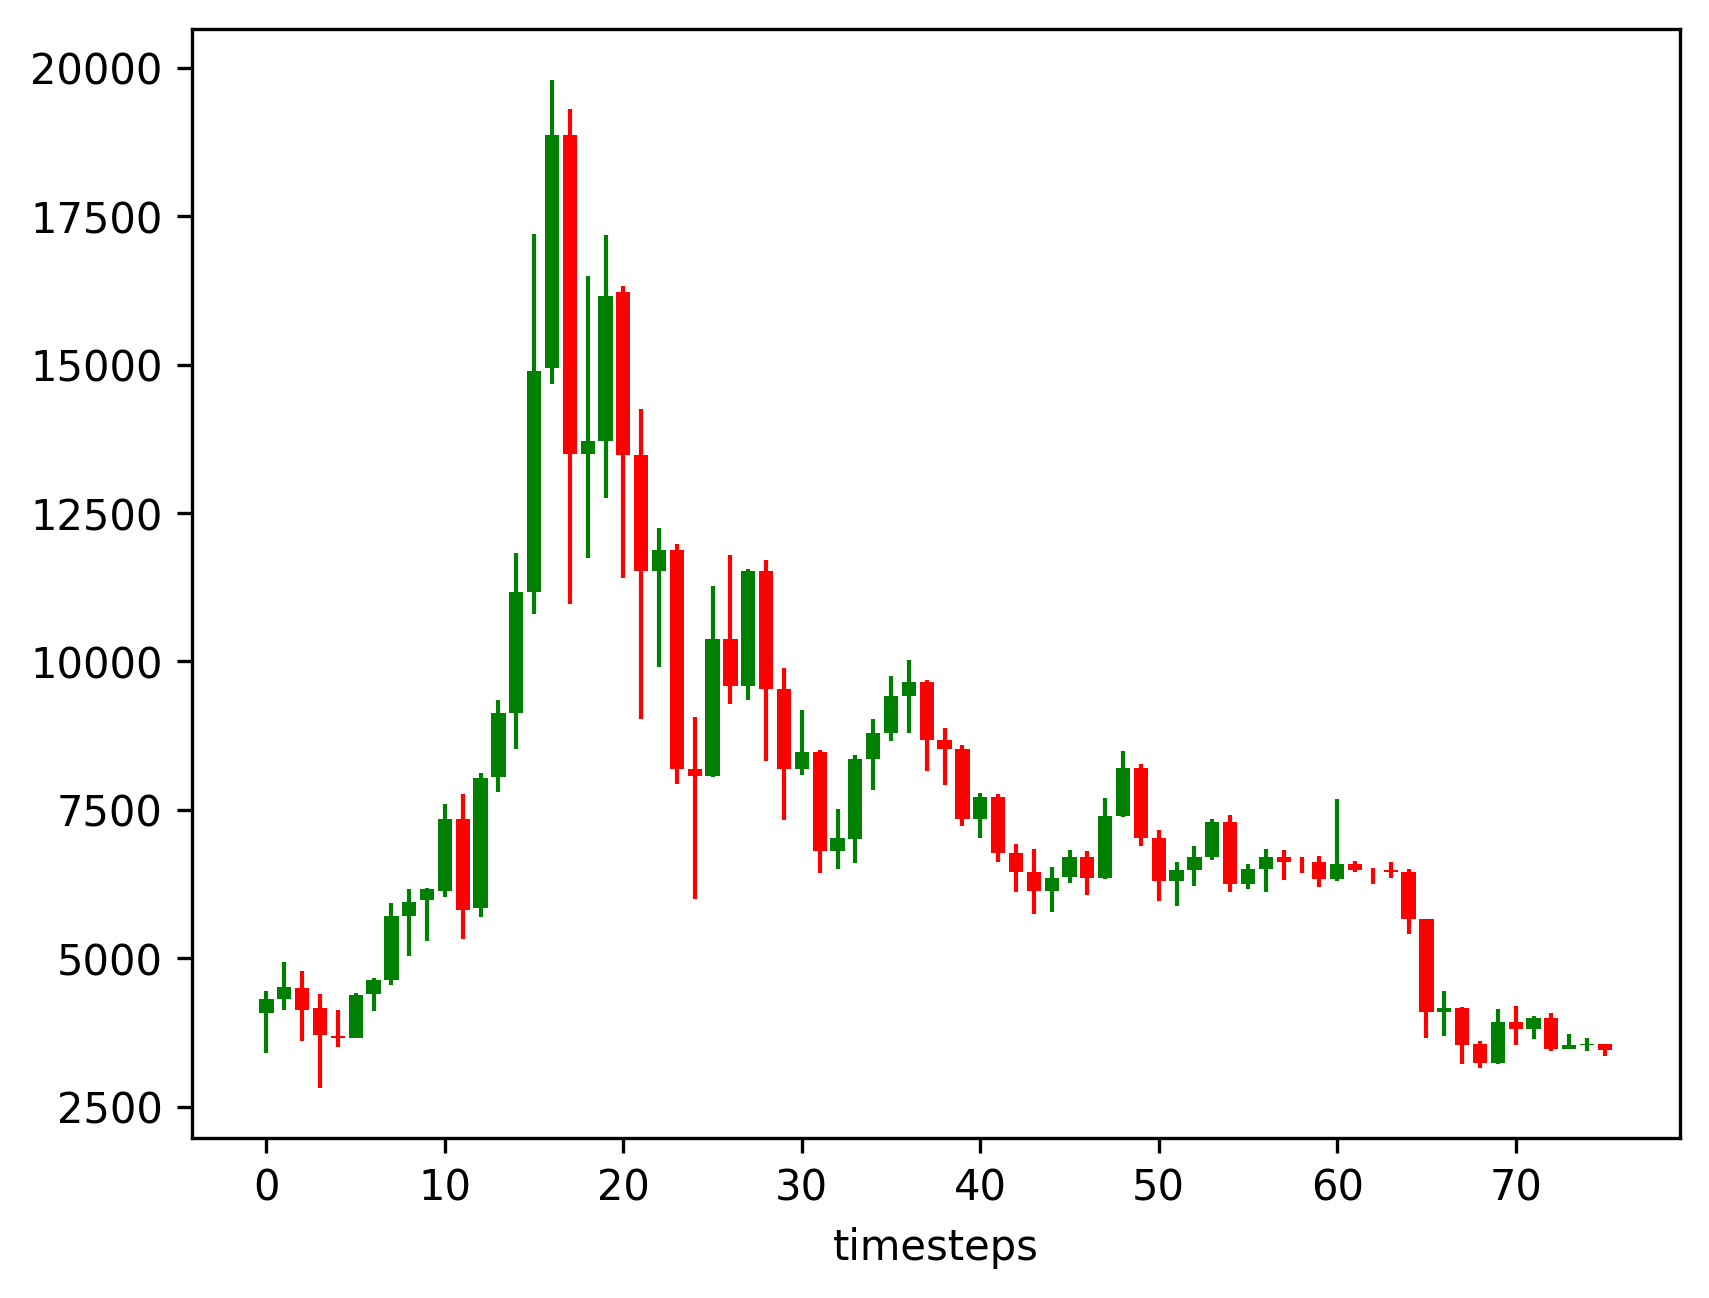

<Figure size 2000x768 with 0 Axes>

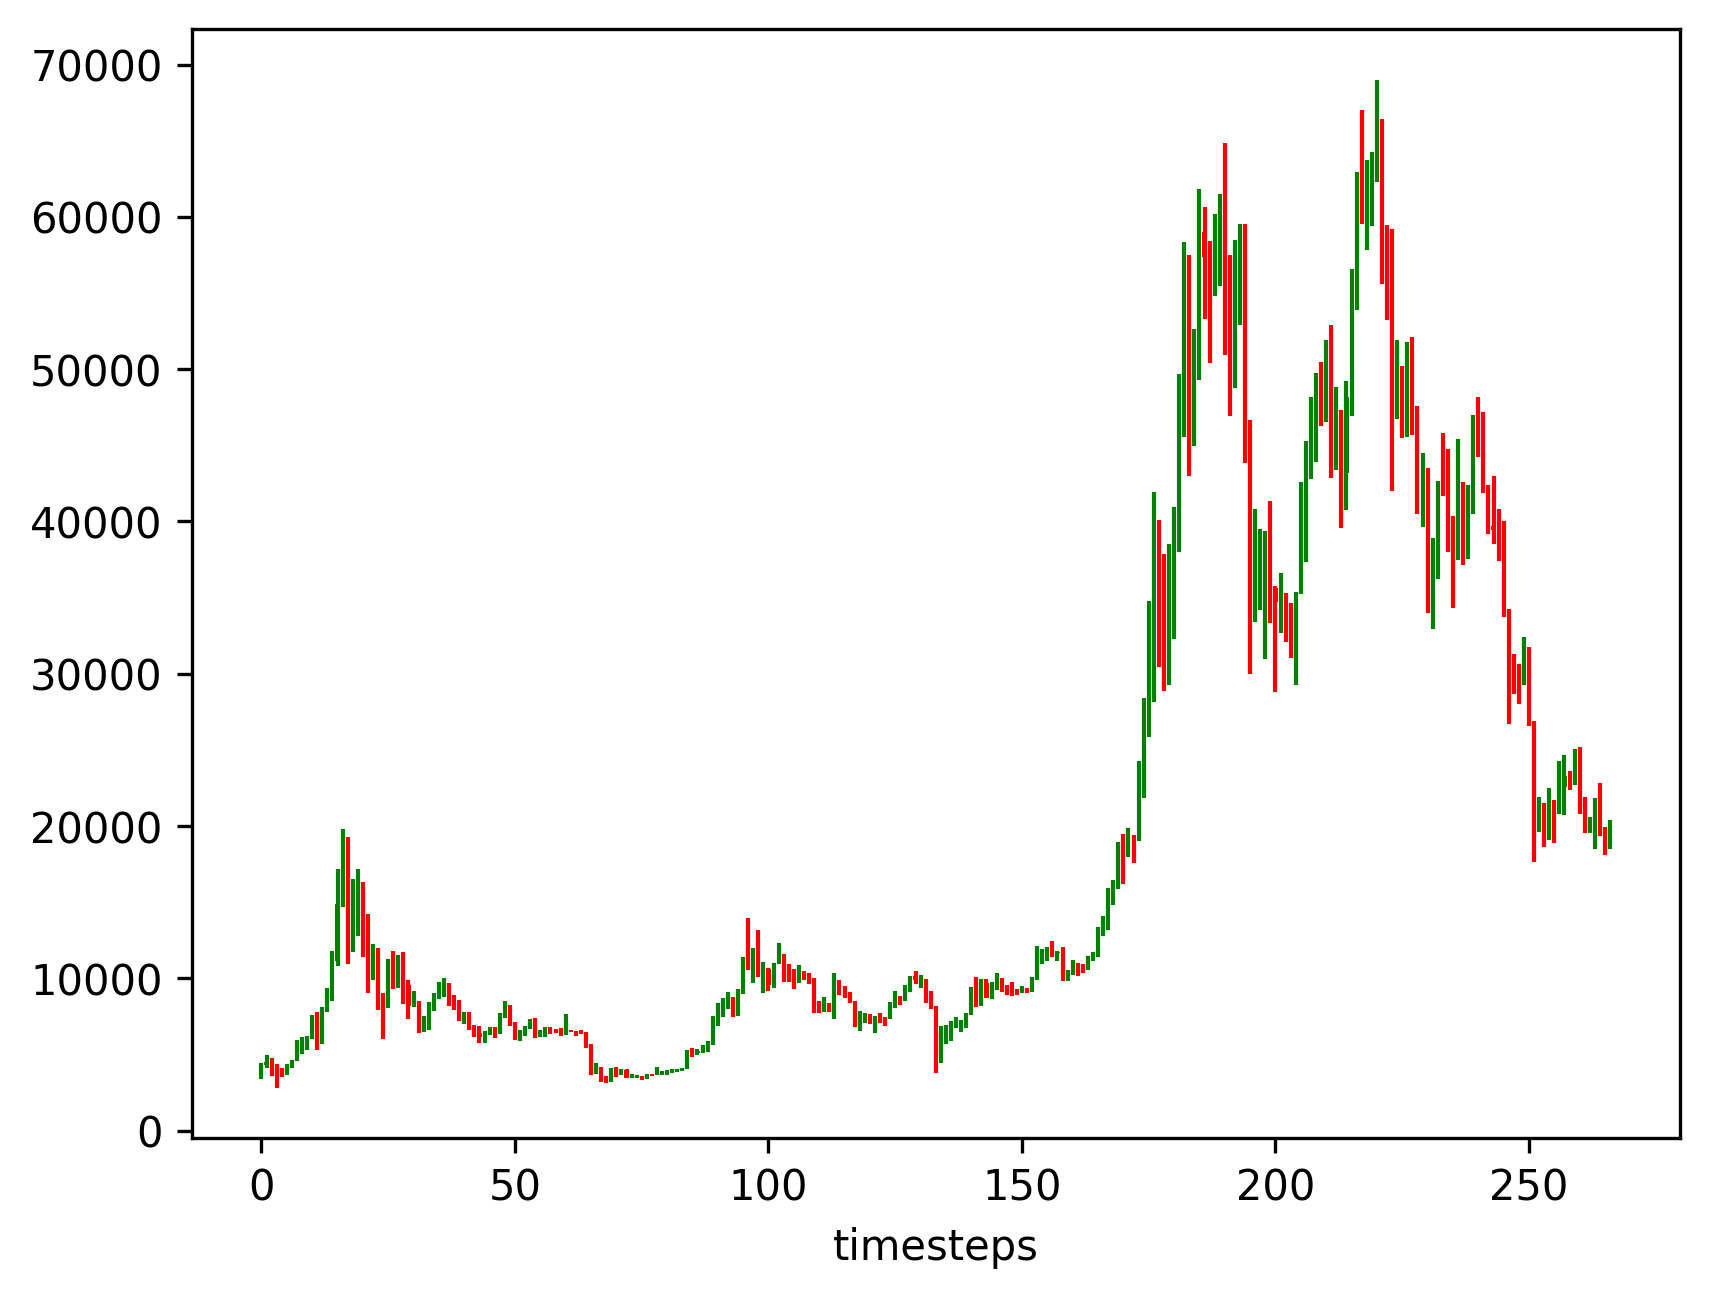

In [14]:
df_weekly = pd.read_csv('BTC_BinWeekly.csv')
start_date = "2017-08-21"
end_date = "2020-09-01"
filename = start_date + "_" + end_date
mask = (df_weekly["date"] > start_date) & (df_weekly["date"] <= end_date)
df_weekly_date = df_weekly.loc[mask]

min_coloumn = df_weekly_date.min(axis=0)
max_coloumn = df_weekly_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_weekly_date.index)

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

candleplot(df_weekly_date, savefig= True, filename=filename)

df_weekly = pd.read_csv('BTC_BinWeekly.csv')
start_date = "2017-08-21"
end_date = "2019-02-01"
filename = start_date + "_" + end_date
mask = (df_weekly["date"] > start_date) & (df_weekly["date"] <= end_date)
df_weekly_date = df_weekly.loc[mask]

min_coloumn = df_weekly_date.min(axis=0)
max_coloumn = df_weekly_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_weekly_date.index)

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

candleplot(df_weekly_date, savefig= True, filename=filename)

df_weekly = pd.read_csv('BTC_BinWeekly.csv')
start_date = "2017-08-21"
end_date = "2022-10-01"
filename = start_date + "_" + end_date
mask = (df_weekly["date"] > start_date) & (df_weekly["date"] <= end_date)
df_weekly_date = df_weekly.loc[mask]

min_coloumn = df_weekly_date.min(axis=0)
max_coloumn = df_weekly_date.max(axis=0)
min_y = min_coloumn['low']
max_y = max_coloumn['high']

min_x = 0
max_x = len(df_weekly_date.index)

print("Min_x : " + str(min_x))
print("Max_x : " + str(max_x))
print("Min_y : " + str(min_y))
print("Max_y : " + str(max_y))

candleplot(df_weekly_date, savefig= True, filename=filename)